In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from matplotlib import animation as matAnim
from celluloid import Camera
from scipy.special import expit
from matplotlib import gridspec

### Define my Logistic regression model

In [2]:
class LogisticRegression(object):
    def __init__(self, x, y, lr=0.01):
        self.lr = lr
        n = x.shape[1] #get number of independant variables
        self.w = np.zeros((1,n)) #initialisation of weight to 0
        self.b = 0.5 #set starting value/bias to 0.5
    
    def predict(self,x):
        """
        x: data to predict
        return predictions
        """
        z = x@self.w.T + self.b
        p = expit(z) #Logistic sigmoid function
        return p
    
    def cost(self, x, y):
        """
        cost function
        x: Input data
        y: output data
        """
        p = self.predict(x)
        cost = - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #cross entropy coss function
        return cost
    
    def gradient_descent(self, x, y):
        p = self.predict(x)
        
        #Partial Derivation
        dw = np.mean((p-y)*x, axis=0) #dJ/dw
        db = np.mean(p-y)             #dJ/db
        
        #We update the values of w and b
        self.w = self.w - dw*self.lr
        self.b = self.b - db*self.lr
    
    def fit(self, x, y, epochs=100000):
        """
        x: Input data
        y: output data
        epochs: Number of epochs
        We create differents vectors in order to store all weights, bias, cost and predicted values (for connection lines)
        """
        self.Weights = np.zeros((epochs, x.shape[1]))
        self.Biases = np.zeros((epochs, x.shape[1]))
        self.Costs = np.zeros((epochs, x.shape[1]))
        self.Cl = np.zeros((epochs, len(x)))
        
        for step in range(epochs):
            self.Weights[step] = self.w
            self.Biases[step] = self.b
            self.Costs[step] = self.cost(x,y)
            self.Cl[step] = (self.predict(x)).T.flatten() #flatten to get a vector
            self.gradient_descent(x,y) #to update parameters values

In [3]:
X_train = np.array([
    [-9,-7],
    [-5,-4],
    [-0.5,-3.6],
    [-5.3,3.5],
    [-1.2,1.7],
    [0.1,-1.5],
    [-0.5,8.2],
    [-3.1,-1.2],
    [-2,-5.8],
    [0.3,-4.4],
    [5.5,-2.3],
    [0.6,-3.1],
    [5,-1.3],
    [8,-5.4],
    [-3,-0.4],
    [6,6.9],
    [8,9]
])
y_train = np.array([
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [1]
])
epochs=100000
#xs=np.array([np.linspace(-150,200)]) # x-values later used for regression curve plot

In [4]:
model = LogisticRegression(X_train, y_train, lr=0.001)

In [5]:
model.fit(X_train, y_train, epochs=epochs)

In [6]:
# Store parameter values in new variables:    
w0=model.Weights.T[0]
w1=model.Weights.T[1]
b= model.Biases
c=model.Costs
cl=model.Cl
print("-------- Multiple logistic regression model:")
print("Final weights: "+ str(model.w))
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(X_train,y_train)))

-------- Multiple logistic regression model:
Final weights: [[0.08954523 0.19335918]]
Final bias: 0.30469515390677515
Final costs: 0.5868532651427398


In [7]:
# cross-check results with sklearn's inbuilt logistic regression model:
from sklearn.linear_model import LogisticRegression as LR
clf = LR(solver="lbfgs").fit(X_train, y_train.ravel())  
print(clf.coef_, clf.intercept_)
pred=expit(X_train @ clf.coef_.T + clf.intercept_)
print(- np.mean(y_train*np.log(pred) + (1-y_train)*np.log(1-pred)))

[[0.08827733 0.1895299 ]] [0.29908466]
0.5868778083563543


In [8]:
b_fixed = float(0.30469515390677515)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


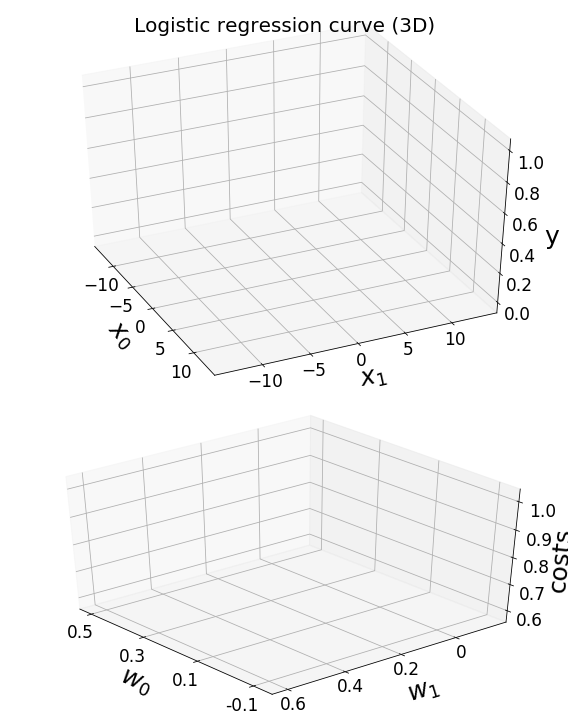

In [9]:
# Regression curve (3D) & surface plot of costs: 

#) Meshgrid for regression curve: 
def pred_3d_curve(X,w,b):   # predicts y-values for regression curve spanned by n0s and n1s (see below)
        p=expit(X @ w.T + b)
        return p
    
n0s = np.linspace(-13, 13, 35) 
n1s = np.linspace(-13, 13, 35)
N1, N2 = np.meshgrid(n0s, n1s) # create meshgrid for regression curve


# Meshgrid for plots of costs: 
def CrossEntropy_cost(x,y,w,b):  # (same as for simple logistic regression!)
        p=expit(x @ w.T + b)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))
    
m0s = np.linspace(-0.12, 0.5, 35) 
m1s = np.linspace(-0.135, 0.6, 35)
M1, M2 = np.meshgrid(m0s, m1s) # create meshgrid for surface plot/contour plot
zs_1 = np.array([CrossEntropy_cost(X_train,y_train, np.array([[wp0,wp1]]), np.array([[b_fixed]])) \
                 for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])

Z_1 = zs_1.reshape(M1.shape) # z-values of surface plot/contour plot

# Create plot:
fig = plt.figure(figsize=(8,10)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1.3, 1]) # set height ratio of subplots

# Customize subplots: 
label_font_size = 25 # size of label fonts
tick_label_size= 17 # size of tick labels
ax0=fig.add_subplot(gs[0], projection="3d")
ax0.set_title("Logistic regression curve (3D)", fontsize=20) # set title
ax0.view_init(elev=38., azim=-25)
ax0.set_xlabel(r'$x_0$', fontsize=label_font_size, labelpad=8)
ax0.set_ylabel(r'$x_1$', fontsize=label_font_size, labelpad=7)
ax0.set_zlabel("y", fontsize=label_font_size, labelpad=6)
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax0.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax0.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d")
ax1.view_init(elev=38., azim=-25)
ax1.view_init(elev=38., azim=140)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax1.tick_params(axis='x', pad=3, which='major', labelsize=tick_label_size)
ax1.tick_params(axis='y', pad=-2, which='major', labelsize=tick_label_size)
ax1.set_xlabel(r'$w_0$', fontsize=label_font_size, labelpad=14)
ax1.set_ylabel(r'$w_1$', fontsize=label_font_size, labelpad=14)
ax1.set_zlabel("costs", fontsize=label_font_size, labelpad=3)
ax1.set_xticks([0.5, 0.3,0.1,-0.1]) 
ax1.set_xticklabels(["0.5", "0.3","0.1","-0.1"], fontsize=tick_label_size)
ax1.set_yticks([0.6,0.4,0.2,0]) 
ax1.set_yticklabels(["0.6","0.4","0.2","0"], fontsize=tick_label_size)
ax1.set_zticks([0.6,0.7,0.8,0.9,1.0]) 
ax1.set_zticklabels(["0.6","0.7","0.8","0.9","1.0"], fontsize=tick_label_size)

# Define which epochs to plot: 
a1=np.arange(0,20,2).tolist()
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,200,20).tolist()
a4=np.arange(200,1700,50).tolist()
points_=a1+a2+a3+a4

camera = Camera(fig) # create camera
for i in points_:
    
    # Plot regression curve: 
    w=np.array([[w0[i],w1[i]]])
    zs_0 = np.array([pred_3d_curve(np.array([[wp0,wp1]]),w, np.array([[b_fixed]]))  
               for wp0, wp1 in zip(np.ravel(N1), np.ravel(N2))])
    Z_0 = zs_0.reshape(N1.shape) # z-values of regression curve
    ax0.plot_surface(N1, N2, Z_0, rstride=1, cstride=1,
                     alpha=0.4,cmap=cm.coolwarm,
                     antialiased=False)
    
    # Scatter plot of training data:
    ax0.scatter(X_train.T[0],X_train.T[1], y_train.flatten(), 
                marker="x",s=28*2,color="black")
    
    # Plot dashed connection lines:
    cl_=cl[i]
    for j in range(len(X_train)):    
        x,y,z = [X_train[j][0],X_train[j][0]],[X_train[j][1],X_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed',
                 alpha=0.4)
    
    # Surface plot of costs: 
    ax1.plot_surface(M1, M2, Z_1, rstride=1, cstride=1,
                     alpha=0.73,cmap=cm.coolwarm)
    
    # Plot trajectory of gradient descent:
    ax1.plot(w0.flatten()[0:i],w1.flatten()[0:i],c.flatten()[0:i],
             linestyle="dashed",linewidth=2, color="black")
    ax1.scatter(w0.flatten()[i],w1.flatten()[i],c.flatten()[i],
                marker="o",s=80*2, color="black")
    
    # Customize legends: 
    ax0.legend([f'costs: {np.round(c[i],3)}'], loc=(0, 0.8), 
               fontsize=17)
    ax1.legend([f'epochs: {i}'], loc=(0, 0.8),
               fontsize=17)
    
    plt.tight_layout()
    camera.snap() # take snapshot after each iteration
    
animation = camera.animate(interval = 130, 
                          repeat = False, repeat_delay = 0) # create animation 
animation.save('LogReg_2.gif', writer = 'imagemagick') # save animation  

In [ ]:
animation.Pi